# How the Spotify popularity index works
Date source: https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets

the Spotify popularity index is calculated by:
* Total streams of a song.
* How recently a song has been played.
* The frequency that a track has been played.
* Since song s are played more recently will be considered as more popular. Some old popular songs may not be as popular as new songs.
* Given the reason above, we can see that loudness has positive correlation with popularity, meaning that loudness is the key factor for the song to be popular nowadays. It does not necessary means that the standard is the same for the old popular songs.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

* Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* duration_ms: The duration of the track in milliseconds.

* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

# Data exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Collection, Data Cleaning & Data Manipulation 
import numpy as np 
import pandas as pd 
from sklearn import datasets 

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#track data
df = pd.read_csv('/content/drive/MyDrive/INST 661/Spotify_dataset/tracks.csv', header = 0)

In [ ]:
df.shape

(586672, 20)

In [ ]:
#check if there's any duplication in the dataframe
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
#extracting numerical feature
numerical_feature = [ feature for feature in df.columns if df[feature].dtypes != "O"] 
numerical_feature

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
#extracting discrete features
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) <15] 
discrete_feature

['explicit', 'key', 'mode', 'time_signature']

In [ ]:
#extracting continuous features
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

## Data Cleaning

In [ ]:
#Remove the square brackets from the artists
df["artists"]=df["artists"].str.replace('[','')
df["artists"]=df["artists"].str.replace(']','')
df["artists"]=df["artists"].str.replace("'",'')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
#check if there's any null
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

* "name" has 71 missing value.

In [ ]:
#drop null
df.dropna(subset = ['name'], inplace=True)

In [ ]:
df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [ ]:
import datetime

In [ ]:
#change the release date format to YYYY/MM/DD
df.release_date = pd.to_datetime(df.release_date)

In [ ]:
print(df.release_date.min())
print(df.release_date.max())

1900-01-01 00:00:00
2021-04-16 00:00:00


In [ ]:
#Consider "1900-01-01" as null value in release_date, dropping the null value in release date
df = df[df.release_date != '1900-01-01']

In [ ]:
print(df.release_date.min())

1922-01-01 00:00:00


##Compare the whole data with top songs

In [ ]:
#see the statistics of each metrics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586600.0,27.573227,18.369429,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586600.0,230054.846036,126532.932733,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586600.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586600.0,0.563612,0.166102,0.0,0.4530,0.577000,0.68600,0.991
energy,586600.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586600.0,5.221599,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586600.0,-10.205798,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586600.0,0.658796,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586600.0,0.104870,0.179903,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586600.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffad8c93e80>,
      dtype=object)

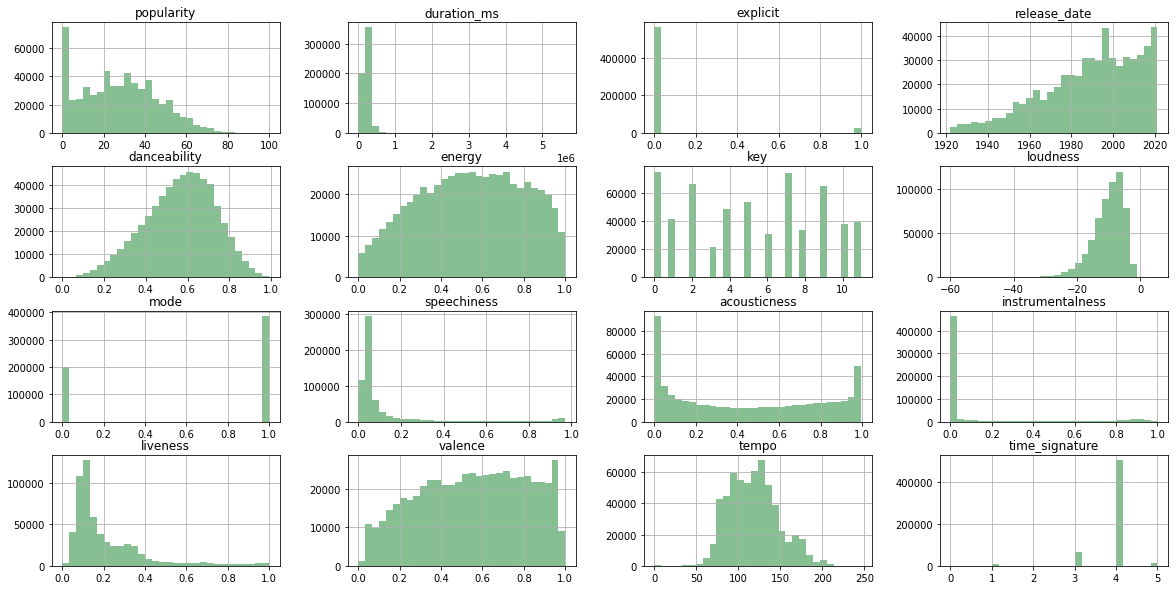

In [ ]:
#see the distribution of each metrics
df.hist(bins = 30, color = '#86bf91', figsize = (20 ,10))

In [ ]:
#create a variable for top songs, in this list, the least popular songs are 79 in popularity.
top_songs = df.sort_values(by=['popularity'], ascending=False).head(1000)
top_songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4


In [ ]:
#see the statistics of each metrics
top_songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,1000.0,82.885000,3.256129,79.000000,80.000000,82.00000,84.000000,100.000
duration_ms,1000.0,207800.465000,47336.865455,80081.000000,177767.500000,202353.00000,230766.000000,536067.000
explicit,1000.0,0.338000,0.473265,0.000000,0.000000,0.00000,1.000000,1.000
danceability,1000.0,0.668790,0.144181,0.000000,0.576500,0.68300,0.773000,0.980
energy,1000.0,0.641013,0.173673,0.003420,0.526000,0.65450,0.770250,0.988
key,1000.0,5.252000,3.642219,0.000000,2.000000,5.00000,8.000000,11.000
loudness,1000.0,-6.305828,2.522732,-28.460000,-7.574250,-5.88750,-4.649750,-1.190
mode,1000.0,0.594000,0.491330,0.000000,0.000000,1.00000,1.000000,1.000
speechiness,1000.0,0.100430,0.094881,0.000000,0.038975,0.05905,0.119000,0.541
acousticness,1000.0,0.231719,0.244905,0.000025,0.035125,0.14500,0.360500,0.978


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaf76ffa60>,
      dtype=object)

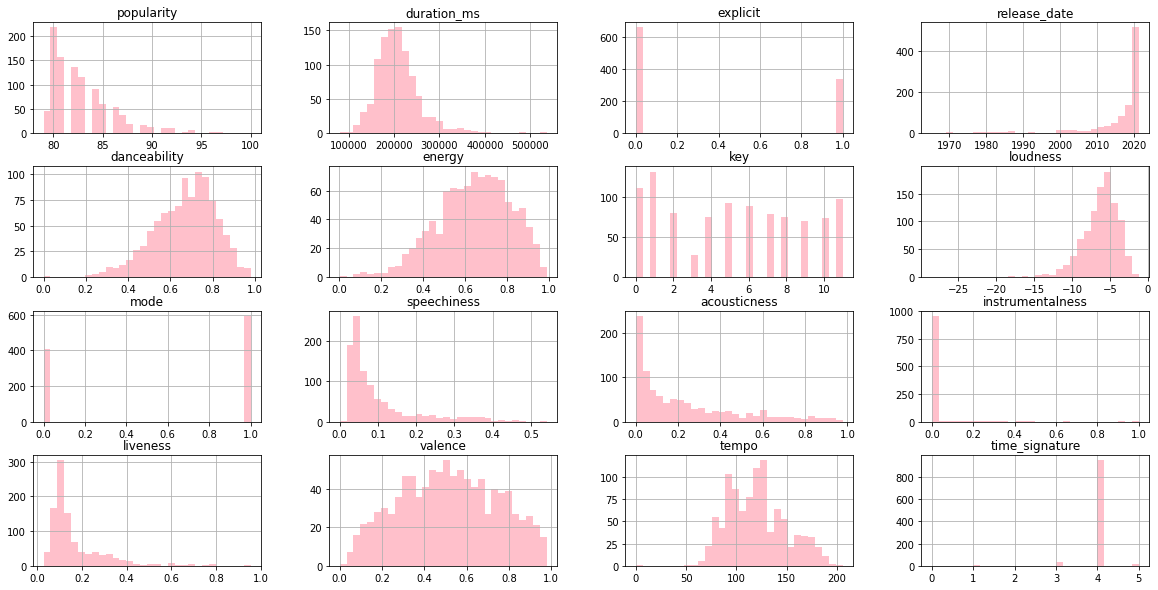

In [ ]:
#see the top song's features distribution. The distribution for top songs and the whole dataset is similar.
top_songs.hist(bins = 30, color = 'pink', figsize = (20 ,10))



1. Top songs’ Song duration is shorter.
2. Top songs are more explicit, danceable, energetic, louder.
3. Top songs are less acoustic, instrumental, faster.
4. The distribution of the audio features for the general data and top songs is similar.



# Data Analysis

In [ ]:
#see the data type of the categorical variables
categorical_df = df.select_dtypes(include = 'object')

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586671
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          586600 non-null  object
 1   name        586600 non-null  object
 2   artists     586600 non-null  object
 3   id_artists  586600 non-null  object
dtypes: object(4)
memory usage: 22.4+ MB


In [ ]:
#how many unique number in each categorical variable
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

id: 586600


name: 446473


artists: 114015


id_artists: 115062




In [ ]:
#Some of the artists have different artist id, that's why the id_artists has more number than artists
df1 = df[['artists', 'id_artists']]
duplicated_artist = df1.groupby('artists')['id_artists'].nunique().loc[lambda x: x > 1]
print(duplicated_artist)

artists
2PM      2
8Ball    2
ABC      3
AIR      2
ASP      2
        ..
陳思安      2
陽帆       2
青山       2
高橋 洋樹    2
黄霄雲      2
Name: id_artists, Length: 931, dtype: int64


In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20, 14))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, 
                   min_font_size=25, 
                   colormap='Set1', 
                   background_color='white', 
                   prefer_horizontal=.95, 
                   width=2100, 
                   height=700, 
                   random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

<Figure size 1440x1008 with 0 Axes>

In [ ]:
#Sort songs by popularity
df.sort_values(by=['popularity'], inplace=True, ascending=False)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4


In [ ]:
#least popular songs
df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
511196,160Yz93afDTF1gNX0xFHWl,Chale Kyon Na Meri Naiya,0,186526,0,Bashir Qawal,['1JgeYJouCruzW9m9x1Xbhp'],1937-12-31,0.325,0.2080,8,-9.982,1,0.0613,0.990,0.000043,0.189,0.573,73.206,4
511195,15XXM8lebkRp1UUVKJMkTC,Sansar Ho Prem Ka Mandir,0,200520,0,Bibbo,['0MDwanHZOy1OwfRUZPFzId'],1937-12-31,0.345,0.2160,5,-10.867,0,0.0532,0.987,0.185000,0.257,0.425,75.866,3
315090,3zC56J4xI5omH4oASfHIJt,"Brennið þið, vitar",0,259088,0,"Páll Ísólfsson, Karlakórinn Fóstbræður, Kór Ís...","['27DN50VakKxJ8rXGYAUNgj', '19OGX5U8snp3kgI2xK...",1969-01-01,0.169,0.1570,0,-19.506,1,0.0348,0.969,0.266000,0.672,0.150,98.543,4
315087,2aH4ntf7RtwaLt4MUQ3PPg,Morgunn í maí,0,140249,0,Guðmundur Jónsson,['2maaML9cG6rRknp161or5V'],1969-01-01,0.477,0.6370,0,-11.993,0,0.0482,0.405,0.000000,0.149,0.854,132.390,4
21304,3G5d1oezNUOy9ULDcDlN1X,Dancing On The Ceiling,0,178440,0,The Soft Winds,['63rpmaHH9fbDKF6zN4fYxE'],1947-01-01,0.363,0.0969,5,-27.380,0,0.0413,0.989,0.916000,0.111,0.317,76.154,4


## Songs released each year

In [ ]:
df['year'] = df['release_date'].dt.year

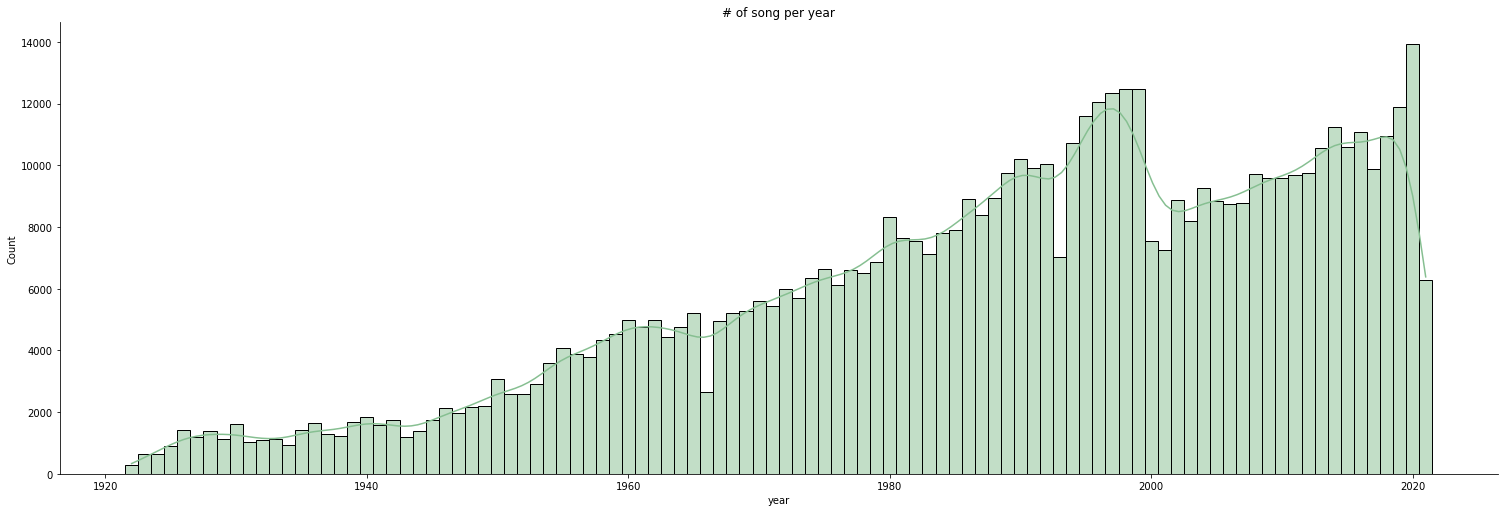

In [ ]:
sns.displot(df['year'], discrete = True, aspect = 3, height = 7, kind = 'hist', kde = True, color = '#86bf91').set(title = '# of song per year')



1.   The general trend of the number of song release increases, the trend hit the peak at 2020.
2.   There are some obvious decline in 1966, 1994, and 2001.



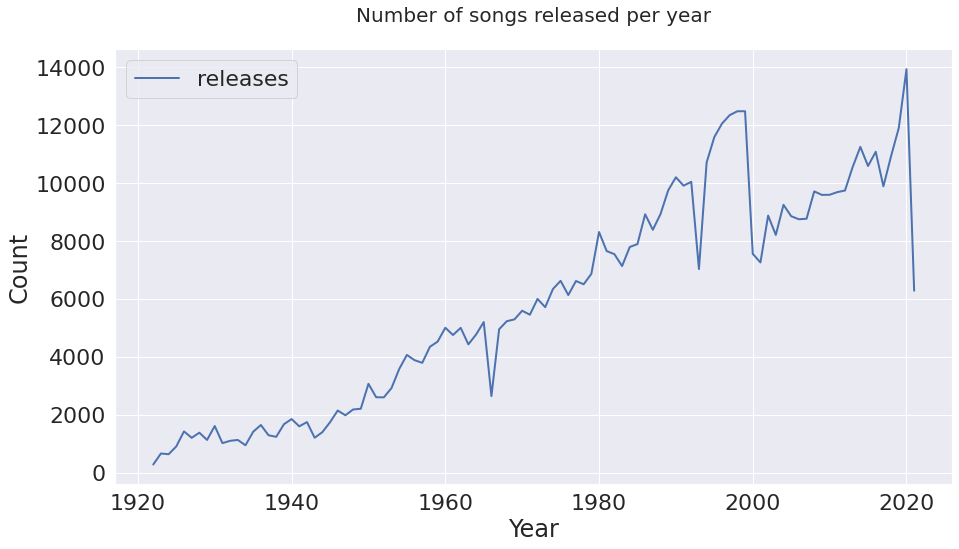

In [ ]:
# numbe of song releases per year. There's a drop in 2021 since the data collected until April 2021
number_of_releases = pd.DataFrame(df['year'].value_counts())
number_of_releases.rename({'year': 'releases'}, axis=1, inplace=True)
number_of_releases = number_of_releases.sort_index()
sns.set(font_scale=2) 
ax=number_of_releases.plot(kind='line',figsize=(15,8), linewidth=2)
plt.title("Number of songs released per year",y=1.05,fontsize=20)
plt.xlabel('Year')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [ ]:
# Normalize the feature by applying minmaxscaler to columns in training data that are not in (0,1) range
scaler = MinMaxScaler()
col = ['loudness']
df[col] = scaler.fit_transform(df[col])

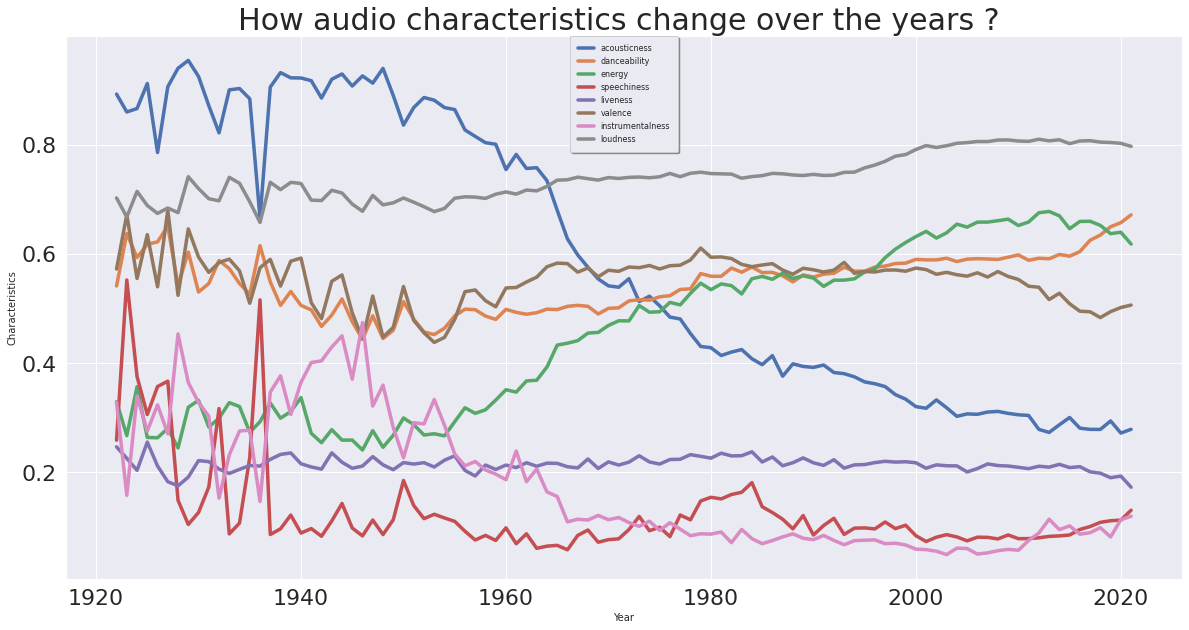

In [ ]:
#Song characteristic over years
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "instrumentalness", "loudness"]
plt.figure(figsize=(20,10))
sns.set(font_scale=2) 

for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,linewidth = 3.5,label=c)

plt.title('How audio characteristics change over the years ? ', fontsize=30)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Characteristics',fontsize=10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 8}, borderaxespad=0)
plt.show()

* acousticness and instrumentalness decline.
* Energy, loudness and danceability increase.
* The highest feature is loudness, danceability, followed by energy, and valance.
* Valence is almost the same.

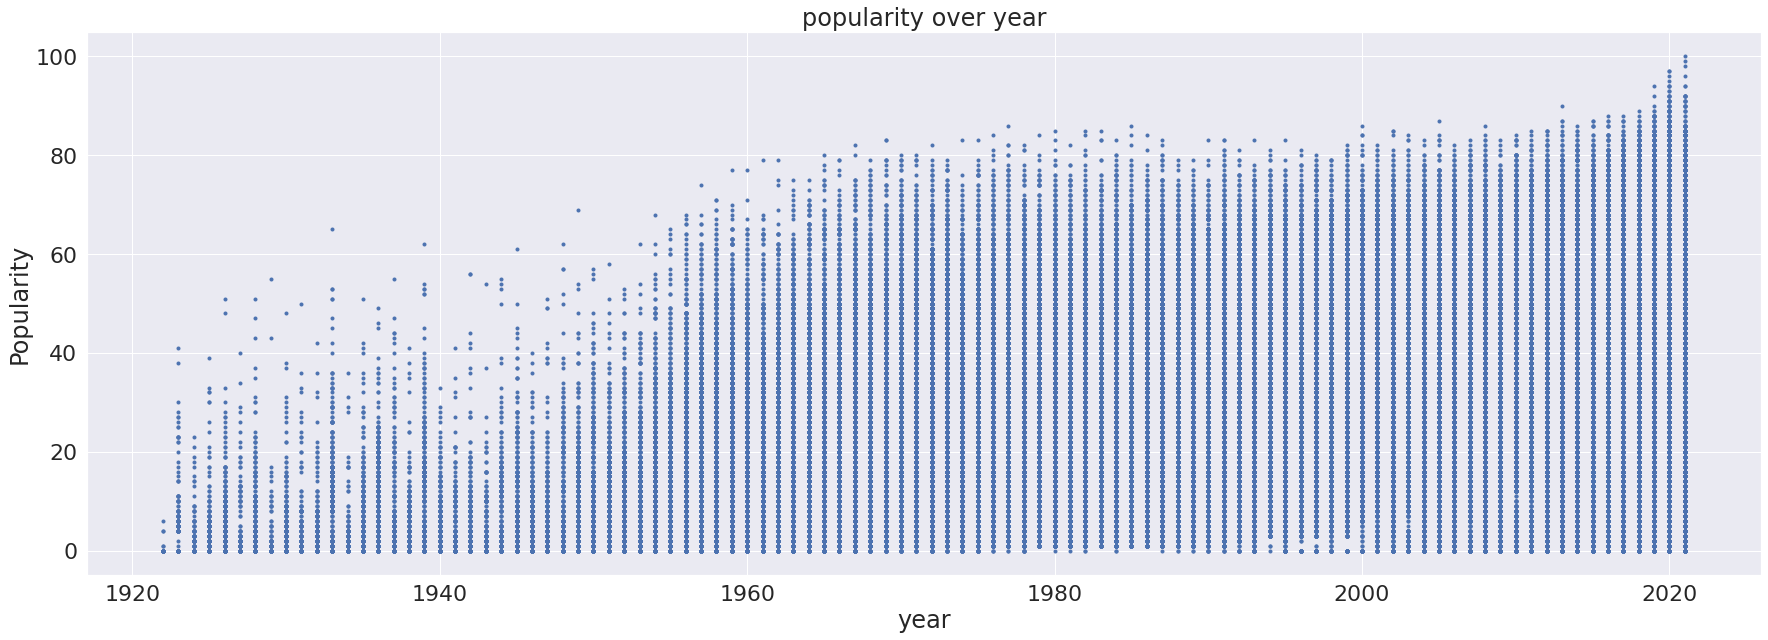

In [ ]:
#relationship between year and popularity
plt.figure(figsize=(30, 10))

xs = df["year"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('year')
plt.title("popularity over year")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean year for song popularity')

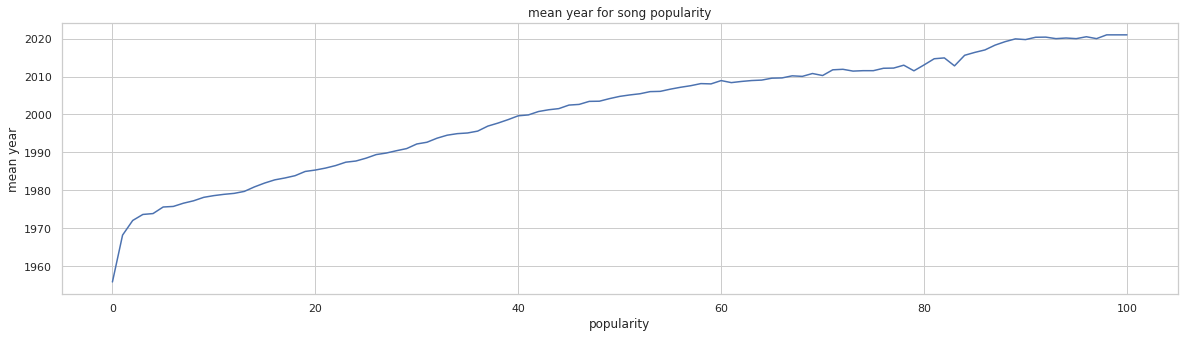

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["year"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean year')
axis.set_xlabel('popularity')
axis.set_title("mean year for song popularity")



*   The top songs are songs released in recent years. Newer songs have a higher chance of being heard, and Spotify calculates popularity base on the current time of stream. So it is reasonable that people listens to newer songs.


In [ ]:
#create a variable for top artists
top_artists = top_songs['artists'].value_counts().head(20)
top_artists

Justin Bieber      12
Billie Eilish      11
Juice WRLD         10
Ariana Grande      10
Taylor Swift        9
The Weeknd          9
Bruno Mars          8
Harry Styles        8
Bad Bunny           8
XXXTENTACION        8
Ed Sheeran          8
Imagine Dragons     7
Dua Lipa            7
BTS                 7
Coldplay            6
One Direction       6
Lewis Capaldi       6
Pop Smoke           6
Maroon 5            6
Post Malone         5
Name: artists, dtype: int64

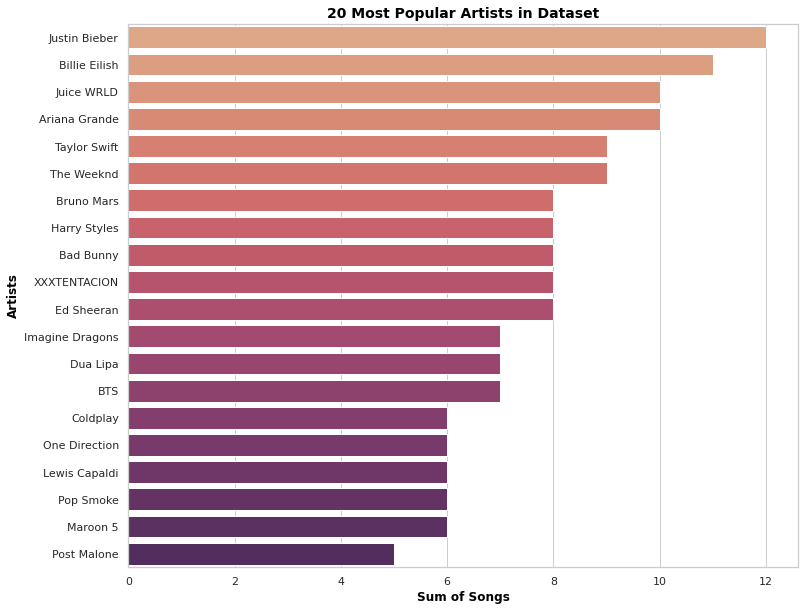

In [ ]:
fig, ax = plt.subplots(figsize = (12, 10))

ax = sns.barplot(x = top_artists.values, y = top_artists.index, palette = 'flare', orient = 'h', ax = ax)

ax.set_xlabel('Sum of Songs', c ='black', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists', c = 'black', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Popular Artists in Dataset', c = 'black', fontsize = 14, weight = 'bold')

plt.show()

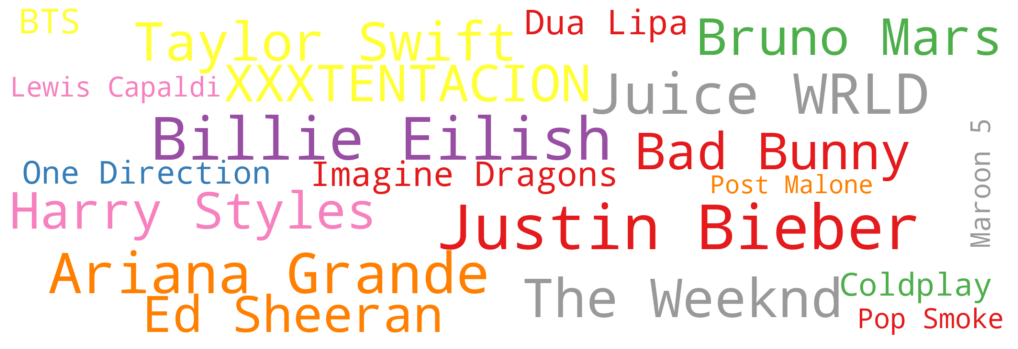

In [ ]:
visualize_word_counts(top_artists)

##Comparing the statistics of top 3 artists

In [ ]:
#What's the top artists' song feature?
Billie = top_songs.loc[top_songs['artists'] == 'Billie Eilish']
Billie.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92845,54bFM56PmE4YLRnqpW6Tha,Therefore I Am,90,174321,0,Billie Eilish,['6qqNVTkY8uBg9cP3Jd7DAH'],2020-11-12,0.889,0.340,11,-7.773,0,0.0697,0.218,0.13000,0.0550,0.716,94.009,4
91880,2Fxmhks0bxGSBdJ92vM42m,bad guy,88,194088,0,Billie Eilish,['6qqNVTkY8uBg9cP3Jd7DAH'],2019-03-29,0.701,0.425,7,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,4
91891,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,87,245426,0,Billie Eilish,['6qqNVTkY8uBg9cP3Jd7DAH'],2019-11-13,0.704,0.225,6,-14.454,0,0.0994,0.902,0.65700,0.1060,0.243,120.006,4
91894,43zdsphuZLzwA9k4DJhU0I,when the party's over,86,196077,0,Billie Eilish,['6qqNVTkY8uBg9cP3Jd7DAH'],2019-03-29,0.367,0.111,4,-14.084,1,0.0972,0.978,0.00004,0.0897,0.198,82.642,4
91957,6CcJMwBtXByIz4zQLzFkKc,i love you,83,291796,0,Billie Eilish,['6qqNVTkY8uBg9cP3Jd7DAH'],2019-03-29,0.421,0.131,0,-18.435,1,0.0382,0.952,0.00453,0.1090,0.120,137.446,4


In [ ]:
#see the statistics of each metrics
Billie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,11.0,83.363636,3.722169,80.0000,80.000000,82.0000,86.5000,90.000
duration_ms,11.0,209950.000000,33262.659605,174321.0000,193615.500000,200379.0000,214849.0000,291796.000
explicit,11.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000
danceability,11.0,0.632364,0.197081,0.3670,0.463500,0.6780,0.7785,0.905
energy,11.0,0.326273,0.126864,0.1110,0.267000,0.3510,0.4005,0.533
key,11.0,6.000000,2.898275,0.0000,4.000000,7.0000,7.5000,11.000
loudness,11.0,-11.633273,3.370285,-18.4350,-14.269000,-10.9560,-9.3295,-7.650
mode,11.0,0.727273,0.467099,0.0000,0.500000,1.0000,1.0000,1.000
speechiness,11.0,0.143791,0.122016,0.0382,0.051500,0.0972,0.2135,0.375
acousticness,11.0,0.665273,0.267811,0.2180,0.426000,0.7400,0.8590,0.978


Compare with the top 1000 song's statistics:
1. All of Billie's stop ongs are not explicit.
2. Almost the same as the top 1000 songs: duration, danceability
3. Less: explicit, energy, loudness, valence
4. More: acoustic, speachness, instrumental, tempo

In [ ]:
Justin = top_songs.loc[top_songs['artists'] == 'Justin Bieber']
Justin.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93811,4u4NyuceXP7Uzh7XFJKCr1,Hold On,92,170813,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-03-05,0.658,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.132,0.290,139.980,4
93822,31qCy5ZaophVA81wtlwLc4,Anyone,90,190779,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-01-01,0.686,0.538,2,-8.026,1,0.0345,0.1810,0.000003,0.113,0.584,115.884,4
93838,1nahzW3kfMuwReTka28tH5,Hold On,88,170813,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-03-19,0.658,0.634,1,-6.068,0,0.0431,0.0104,0.000000,0.120,0.302,140.002,4
93878,2WnAKZefdRHxtBEkRjFOHC,Anyone,85,190779,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-03-19,0.685,0.521,2,-8.285,1,0.0345,0.1850,0.000004,0.111,0.578,115.885,4
87956,50kpGaPAhYJ3sGmk6vplg0,Love Yourself,84,233720,0,Justin Bieber,['1uNFoZAHBGtllmzznpCI3s'],2015-11-13,0.609,0.378,4,-9.828,1,0.4380,0.8350,0.000000,0.280,0.515,100.418,4


In [ ]:
#see the statistics of each metrics
Justin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,12.0,84.166667,3.996210,79.000000,81.75000,83.5000,85.750000,92.00000
duration_ms,12.0,182706.583333,24037.854153,152796.000000,167226.75000,183327.0000,193281.000000,233720.00000
explicit,12.0,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000
danceability,12.0,0.643000,0.084791,0.509000,0.59650,0.6560,0.679000,0.84500
energy,12.0,0.569500,0.161029,0.228000,0.50175,0.6000,0.660750,0.76000
key,12.0,3.250000,2.667140,0.000000,1.75000,2.0000,4.250000,9.00000
loudness,12.0,-7.345917,1.719193,-9.828000,-8.36400,-7.9285,-6.000250,-3.66900
mode,12.0,0.666667,0.492366,0.000000,0.00000,1.0000,1.000000,1.00000
speechiness,12.0,0.081725,0.113714,0.033200,0.03960,0.0450,0.055125,0.43800
acousticness,12.0,0.301782,0.338348,0.000284,0.02620,0.1830,0.590750,0.92000


Compare with the top 1000 song's statistics:
1. All of Justin's top songs are not explicit.
2. Almost the same as the top 1000 songs: danceability, loudness
3. Less: explicit, energy, speachness, duration, instrumental, valence, tempo
4. More: acoustic

In [ ]:
#What's the top artists' song feature?
Juice = top_songs.loc[top_songs['artists'] == 'Juice WRLD']
Juice.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
90901,285pBltuF7vW8TeWk8hdRR,Lucid Dreams,88,239836,1,Juice WRLD,['4MCBfE4596Uoi2O4DtmEMz'],2018-12-10,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.2180,83.903,4
90903,4VXIryQMWpIdGgYR4TrjT1,All Girls Are The Same,87,165820,1,Juice WRLD,['4MCBfE4596Uoi2O4DtmEMz'],2018-12-10,0.671,0.529,0,-7.226,1,0.3070,0.07690,0.000335,0.0856,0.2030,161.989,4
91887,6Hj9jySrnFppAI0sEMCZpJ,Robbery,87,240051,1,Juice WRLD,['4MCBfE4596Uoi2O4DtmEMz'],2019-03-08,0.685,0.692,2,-5.122,1,0.0457,0.32800,0.000000,0.1530,0.5780,159.966,5
92895,2U5WueTLIK5WJLD7mvDODv,Wishing Well,87,194621,1,Juice WRLD,['4MCBfE4596Uoi2O4DtmEMz'],2020-07-10,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.000000,0.2670,0.0804,149.972,4
93105,5dOxHHMOFAbG3VH23t0xNm,Righteous,82,242181,1,Juice WRLD,['4MCBfE4596Uoi2O4DtmEMz'],2020-07-10,0.706,0.625,0,-7.426,1,0.0314,0.04170,0.000000,0.1290,0.2250,142.948,4


In [ ]:
#see the statistics of each metrics
Juice.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,10.0,83.400000,3.373096,80.00000,81.000000,81.50000,87.00000,88.000000
duration_ms,10.0,205019.500000,33585.421448,165820.00000,177231.500000,193230.50000,239997.25000,248431.000000
explicit,10.0,1.000000,0.000000,1.00000,1.000000,1.00000,1.00000,1.000000
danceability,10.0,0.671000,0.073714,0.51100,0.653750,0.67800,0.72850,0.747000
energy,10.0,0.632700,0.077080,0.52900,0.577750,0.62350,0.66525,0.798000
key,10.0,4.300000,4.398232,0.00000,0.250000,3.00000,8.25000,11.000000
loudness,10.0,-6.128900,0.959191,-7.42600,-7.095000,-5.97750,-5.31175,-4.869000
mode,10.0,0.800000,0.421637,0.00000,1.000000,1.00000,1.00000,1.000000
speechiness,10.0,0.142800,0.100832,0.03140,0.081475,0.10620,0.18900,0.311000
acousticness,10.0,0.139316,0.119822,0.00336,0.050225,0.09595,0.18350,0.349000


Compare with the top 1000 song's statistics:
1. All of Juice WRLD's top songs are explicit.
2. Almost the same as the top 1000 songs: duration, danceability, loudness, energy
3. Less: explicit, instrumental, valence, tempo
4. More: acoustic, speachness

* ”Danceability“ seems to be the key feature for top songs.

##Look into features

In [ ]:
#create a variable for songs that popularity >50
most_popularity = df.query('popularity > 50', inplace = False).sort_values('popularity', ascending = False)

In [ ]:
#Extract only name, artist, and popularity from top 1000 songs
# popular_songs = most_popularity[['name', 'artists', 'popularity']].head(1000)

In [ ]:
#See the feature difference between the whole dataset and top 1000 songs
from sklearn import preprocessing

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','loudness']

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(most_popularity[feat_cols].mean(), ignore_index=True)
mean_vals = mean_vals.append(df[feat_cols].mean(), ignore_index=True)

print(mean_vals)

import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top songs'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.617786  0.634978     0.088888      0.290810          0.049572   
1      0.563612  0.542071     0.104870      0.449803          0.113425   

   liveness   valence  loudness  
0  0.187692  0.530486  0.802445  
1  0.213933  0.552306  0.761659  




*   We can see that top songs have greater number of energy, dancibility, and valence.



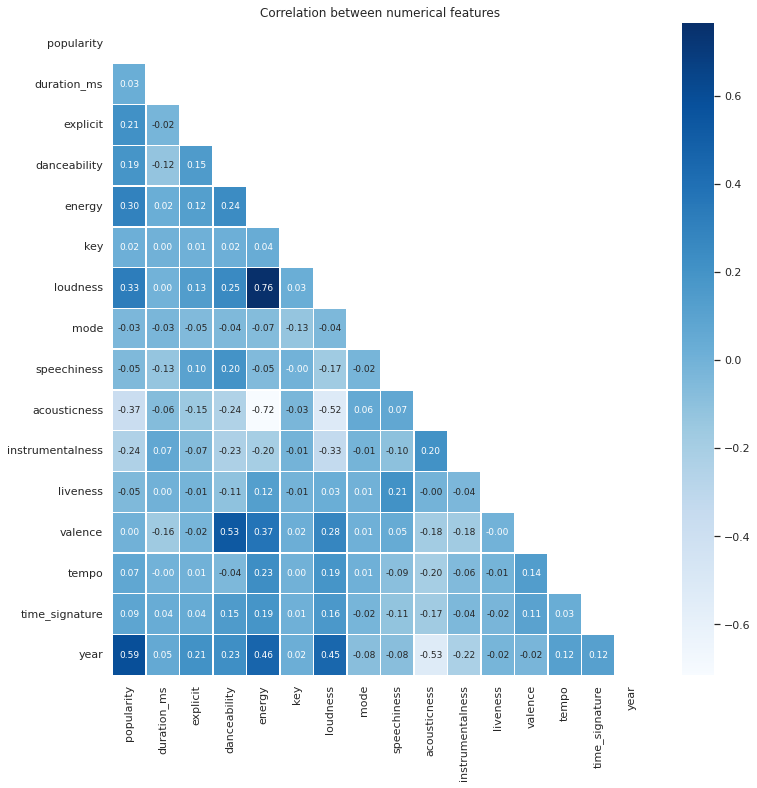

In [ ]:
#Create a heat map to see the correlation between different metrics
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.2f',ax=ax,cmap="Blues",mask=mask, annot_kws={"fontsize":9})
plt.title('Correlation between numerical features')
plt.show() 


In [ ]:
corr_matrix = df.corr()
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.590801
loudness            0.327002
energy              0.302179
explicit            0.211749
danceability        0.186879
time_signature      0.086713
tempo               0.071224
duration_ms         0.027638
key                 0.015306
valence             0.004560
mode               -0.033652
speechiness        -0.047415
liveness           -0.048736
instrumentalness   -0.236403
acousticness       -0.370724
Name: popularity, dtype: float64

In [ ]:
top_songs['year'] = top_songs['release_date'].dt.year

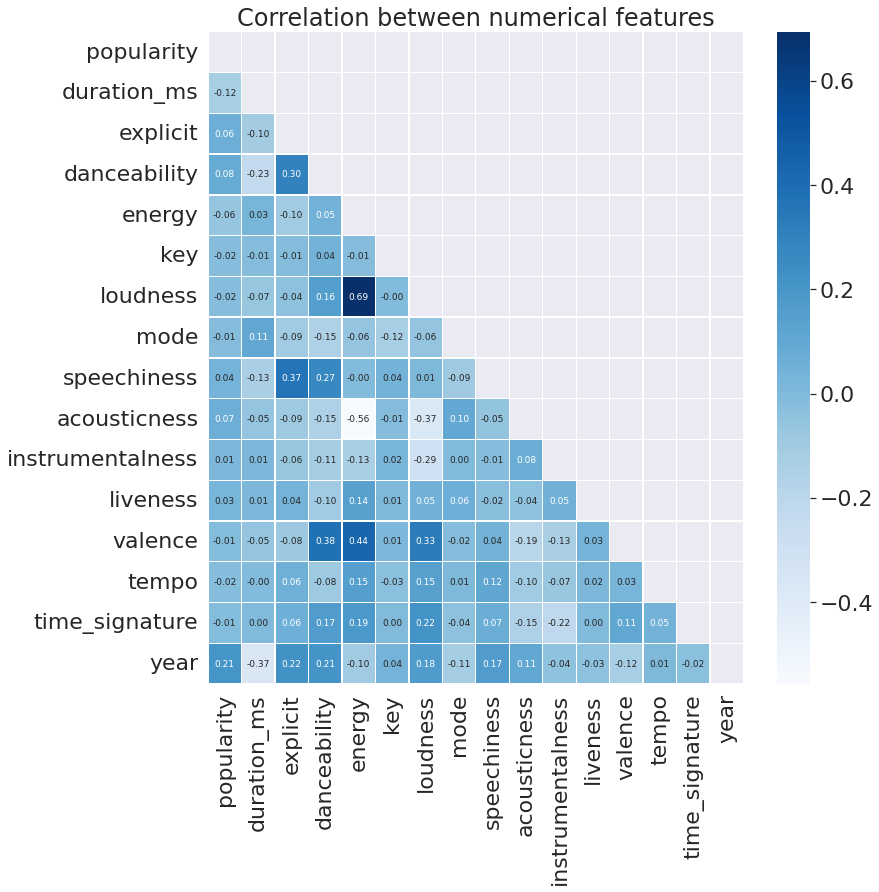

In [ ]:
#Create a heat map to see the correlation between different metrics
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(top_songs.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(top_songs.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.2f',ax=ax,cmap="Blues",mask=mask, annot_kws={"fontsize":9})
plt.title('Correlation between numerical features')
plt.show() 


In [ ]:
corr_matrix2 = top_songs.corr()
corr_matrix2["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.207013
danceability        0.084594
acousticness        0.067642
explicit            0.064873
speechiness         0.035651
liveness            0.029827
instrumentalness    0.013224
valence            -0.005754
time_signature     -0.007879
mode               -0.009817
key                -0.015195
tempo              -0.016290
loudness           -0.016726
energy             -0.062493
duration_ms        -0.119533
Name: popularity, dtype: float64

Observations on what attributes make a song more popular:

* As expected, popularity is highly correlated with the year released. As the Spotify algorithm decides how popular a song is, it generates it's "popularity" metric by how recent the streams of the song are, not just the total number of streams the song has received.

* danceability plays as the most important factor in influencing a song's popularity with a 0.084 correlation ratio. 

* Acousticness, explicit, and speechiness are also relatively highly correlated with popularity.

* Acousticness is only correlated with popularity and year but not with other audio features.

* Explicit is highly correlated with speechiness, danceability, and year.

* Speechiness is highly correlated with energy, danceability, and year.

* The correlation of audio feature between top songs and general dataset is quite different.

* Valence and dancability are highly correlated.

* From this data, we can predict that an artist with a high energy and more danceable song has the best chance of gaining the most popularity.

* Acoustic songs also have a good chance to be popular.

* We can also conclude that a hip-hop song maybe more popular nowadays since it's more speechiness and has more explicit lyrics.

#Train test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
df2 = train.copy()
len(df2)

469280

# Create New Feature and build model pipeline

In [ ]:
#0 as less popular, 1 as highly popular
df2["highly_popular"] = pd.cut(df2["popularity"],
                               bins=[0, 49, 100],
                               labels=[0, 1],
                                include_lowest=True)

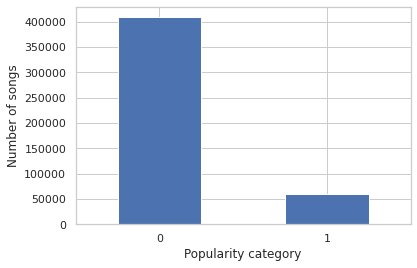

In [ ]:
df2["highly_popular"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.show()

In [ ]:
#number of not popular and popular
#15% of the song is categorized as popular, 85% is not popular.

df2['highly_popular'].value_counts()

0    408616
1     60664
Name: highly_popular, dtype: int64

In [ ]:
#set popularity as target for training data
df2 = df2.drop(labels = ['popularity'], axis = 1)

In [ ]:
#set random seed
np.random.seed(42)

In [ ]:
X_train = df2.copy()
y_train = df2.pop("highly_popular")

In [ ]:
#resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
#random over sample to increase resolution and to reduce noise.
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
df3 = test.copy()

In [ ]:
df3["highly_popular"] = pd.cut(df3["popularity"],
                               bins=[0, 49, 100],
                               labels=[0,1],
                                include_lowest=True)

In [ ]:
#set popularity as target for testing data
X_test = df3.copy()
y_test = df3.pop("highly_popular")

In [ ]:
#Build Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config

set_config(display='diagram')

In [ ]:
#monkey patching allows us to modify or extend the behavior of libraries, modules, classes or methods at runtime without actually modifying the source code
#it used to modify the behavior of a machine learning library or framework, in order to add new functionality or fix a bug
def monkey_patch_get_signature_names_out():
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [ ]:
# Robust Scaler removes the median and scales the data according to the quantile range.
# Simple Imputer handles the missing data in the predictive model dataset
# ratio pipeline provides a more interpretable and intuitive way of representing and manipulating data

def column_ratio(X):
    return X[:, [0]] / (1000*60)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        RobustScaler())

In [ ]:
#create pipeline for different attributes
num_attribs = ['explicit', 'danceability', 'energy', 'key', 'loudness', 
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

cat_attribs = []

# log_attribs = ['duration_ms']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             RobustScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             RobustScaler())

preprocessing = ColumnTransformer([
        # ("log", log_pipeline, log_attribs),
    ("duration", ratio_pipeline(), ["duration_ms"]),
        ("cat", cat_pipeline, cat_attribs),
        ('num', num_pipeline, num_attribs)],
        remainder='drop')

In [ ]:
preprocessing

ColumnTransformer(transformers=[('duration',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7ffadd3c5c10>,
                                                                      func=<function column_ratio at 0x7ffafa165ee0>)),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['duration_ms']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  Simp...egy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 []),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['explicit', 'danceability', 'energy', 'key',
                                  'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo',
                                  'time_signature'])])

In [ ]:
#Build model
def print_score(classifier, X_train, y_train, X_test, y_test):
        
    # Training set
    
    print('\n\n')

    print("TRAINING RESULTS:\n")

    # Predict
    y_train_pred = classifier.predict(X_train)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_train, y_train_pred, digits = 4)}\n')
    
    print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}\n')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title("train")
    ax[1].set_title("test")
    
    print(sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="g", annot_kws={"size": 16}, ax=ax[0]))
    
    print('\n\n')
    
    # Test set

    print("TEST RESULTS:\n")

    # Predict
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

    print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')
    
    print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g", annot_kws={"size": 16}, ax=ax[1]))
    
    print('\n\n')

* AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
* excellent for AUC values between 0.9-1, 
* good for AUC values between 0.8-0.9, 
* fair for AUC values between 0.7-0.8, 
* poor for AUC values between 0.6-0.7
* failed for AUC values between 0.5-0.6.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Use logistic regression to fit training data
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f3e8e492ca0>,
                                                                                       func=<function column_ratio at 0x7f3e8e492280>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression', LogisticRegression())])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7034    0.6677    0.6851    408616
           1     0.6838    0.7184    0.7006    408616

    accuracy                         0.6931    817232
   macro avg     0.6936    0.6931    0.6929    817232
weighted avg     0.6936    0.6931    0.6929    817232


ROC AUC Score: 0.6930626798754821

Confusion Matrix:
[[272849 135767]
 [115072 293544]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9418    0.6676    0.7813    102141
           1     0.2441    0.7222    0.3648     15179

    accuracy                         0.6747    117320
   macro avg     0.5929    0.6949    0.5731    117320
weighted avg     0.8515    0.6747    0.7275    117320


ROC AUC Score: 0.6948991481020381

Confusion Matrix:
[[68191 33950]
 [ 4217 10962]]

AxesSubplot(0.547727,0.125;0.281818x0.755)



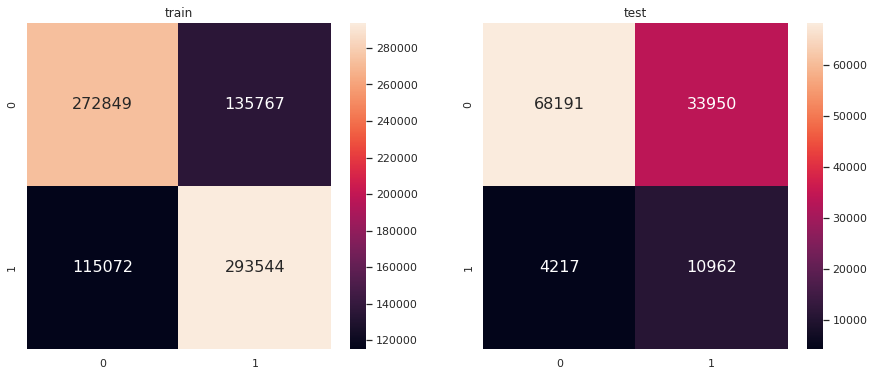

In [ ]:
#see the accuracy
#ROC AUC score is a metric used to evaluate the performance of a binary classification model.Lower than 0.5 is not good.
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
#Pipeline's named_steps attribute allows accessing steps by name with tab completion in interactive environments
# classifier.named_steps["logistic_regression"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Adjust the parameter and get a slightly beetter accuracy
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression(C=100, penalty = 'l2', solver = 'lbfgs', max_iter = 1000)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f3e8e492ca0>,
                                                                                       func=<function column_ratio at 0x7f3e8e492280>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logistic_regression',
                 LogisticRegression(C=100, max_iter=1000))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7025    0.6685    0.6851    408616
           1     0.6838    0.7170    0.7000    408616

    accuracy                         0.6927    817232
   macro avg     0.6932    0.6927    0.6925    817232
weighted avg     0.6932    0.6927    0.6925    817232


ROC AUC Score: 0.6927139416958709

Confusion Matrix:
[[273148 135468]
 [115656 292960]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9417    0.6683    0.7818    102141
           1     0.2444    0.7218    0.3651     15179

    accuracy                         0.6752    117320
   macro avg     0.5930    0.6950    0.5735    117320
weighted avg     0.8515    0.6752    0.7279    117320


ROC AUC Score: 0.6950441701965839

Confusion Matrix:
[[68261 33880]
 [ 4223 10956]]

AxesSubplot(0.547727,0.125;0.281818x0.755)



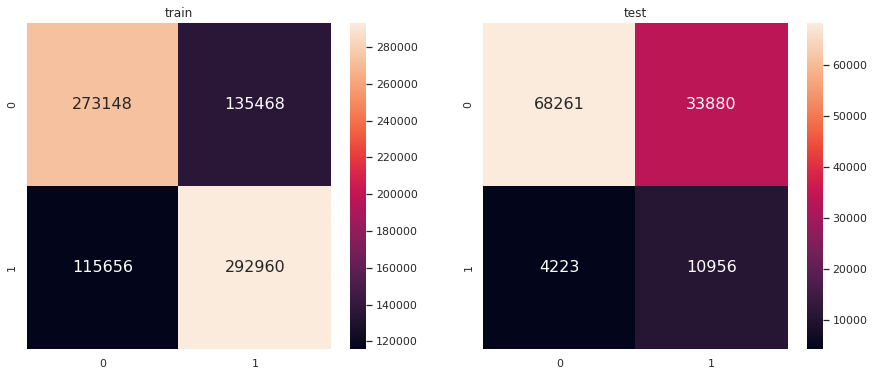

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
feature_names = ['duration', 'explicit', 'danceability', 'energy', 'key', 'loudness', 
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

In [ ]:
#Get the importance of the features
importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': classifier.named_steps["logistic_regression"].coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

importances

,Attribute,Importance
1,explicit,1.377579
5,loudness,0.761548
2,danceability,0.548141
12,tempo,0.088612
13,time_signature,0.024828
6,mode,0.018649
4,key,0.010556
9,instrumentalness,-0.001266
0,duration,-0.024052
7,speechiness,-0.076989


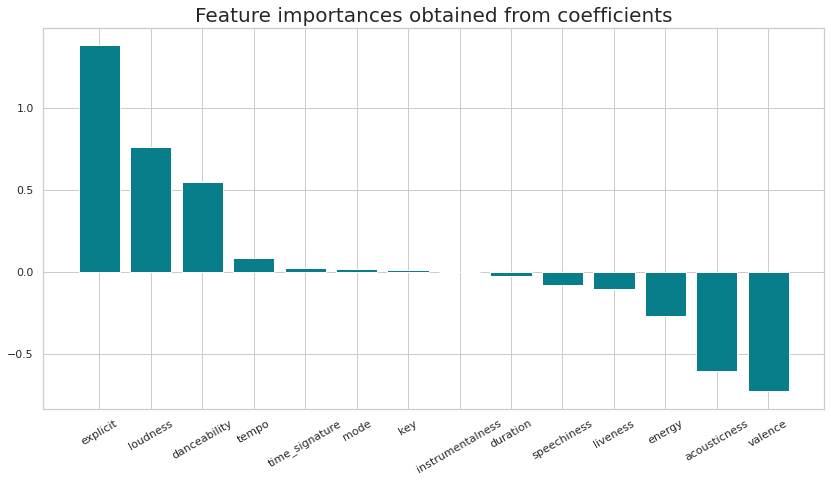

In [ ]:
#Graph of the importance
plt.figure(figsize = (14, 7))

plt.bar(x=importances['Attribute'], height = importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=30)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ffadd3c5c10>,
                                                                                       func=<function column_ratio at 0x7ffafa165ee0>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9939    0.9969    408616
           1     0.9940    0.9999    0.9969    408616

    accuracy                         0.9969    817232
   macro avg     0.9969    0.9969    0.9969    817232
weighted avg     0.9969    0.9969    0.9969    817232


ROC AUC Score: 0.9969237621630088

Confusion Matrix:
[[406143   2473]
 [    41 408575]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8972    0.9668    0.9307    102141
           1     0.5327    0.2547    0.3446     15179

    accuracy                         0.8747    117320
   macro avg     0.7150    0.6107    0.6377    117320
weighted avg     0.8501    0.8747    0.8549    117320


ROC AUC Score: 0.6107473900452489

Confusion Matrix:
[[98750  3391]
 [11313  3866]]

AxesSubplot(0.547727,0.125;0.281818x0.755)



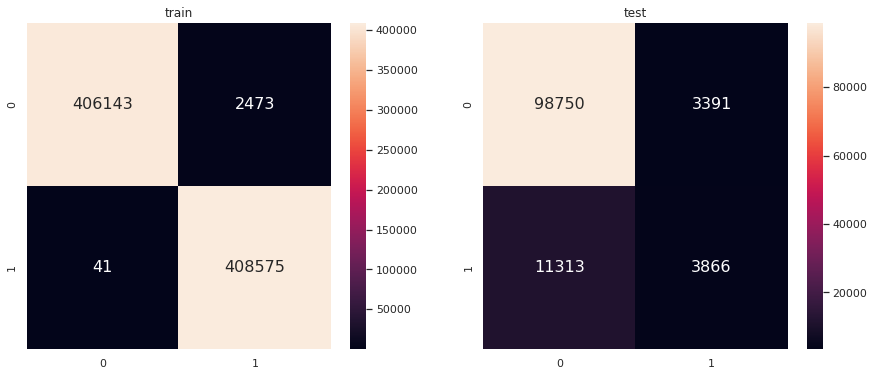

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
classifier.named_steps["random_forest"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#tried to adjust the parameter but the accuracy didn't get better
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(n_estimators = 300,
                                            max_features = 'sqrt',
                                            max_depth = 50,
                                            min_samples_leaf = 3,
                                            min_samples_split = 2,
                                            criterion = 'entropy',
                                            bootstrap = True,
                                            random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ffadd3c5c10>,
                                                                                       func=<function column_ratio at 0x7ffafa165ee0>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        max_features='sqrt', min_samples_leaf=3,
                                        n_estimators=300, random_state=42))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9918    0.9957    408616
           1     0.9919    0.9996    0.9957    408616

    accuracy                         0.9957    817232
   macro avg     0.9957    0.9957    0.9957    817232
weighted avg     0.9957    0.9957    0.9957    817232


ROC AUC Score: 0.9957074612839438

Confusion Matrix:
[[405273   3343]
 [   165 408451]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9055    0.9508    0.9276    102141
           1     0.5007    0.3321    0.3993     15179

    accuracy                         0.8707    117320
   macro avg     0.7031    0.6414    0.6635    117320
weighted avg     0.8531    0.8707    0.8592    117320


ROC AUC Score: 0.6414436423389152

Confusion Matrix:
[[97114  5027]
 [10138  5041]]

AxesSubplot(0.547727,0.125;0.281818x0.755)



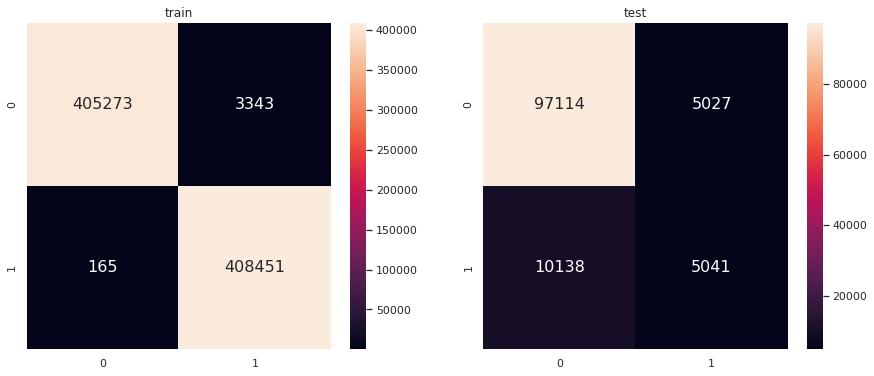

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
classifier.named_steps["random_forest"].feature_importances_

array([0.09427791, 0.02676178, 0.08754561, 0.08862098, 0.04039379,
       0.13824443, 0.00959937, 0.08879546, 0.11004035, 0.06102795,
       0.0796371 , 0.09026071, 0.07882851, 0.00596603])

In [ ]:
feature_names = ['duration', 'explicit', 'danceability', 'energy', 'key', 'loudness', 
               'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'time_signature']

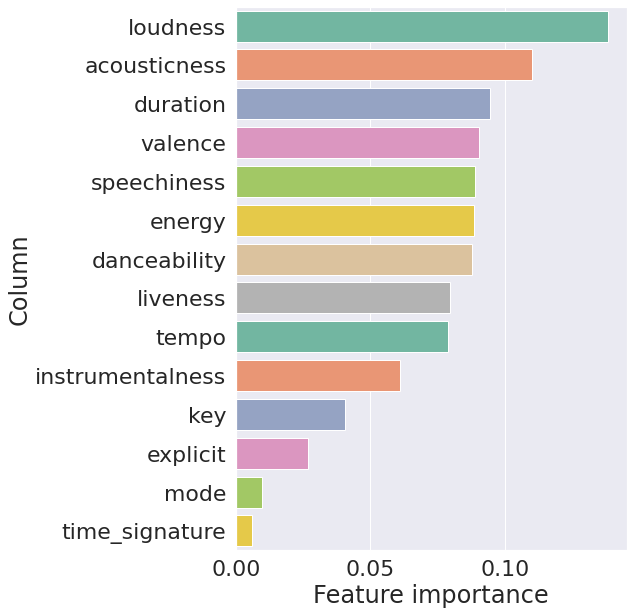

In [ ]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["random_forest"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

In [ ]:
#Get the importance of the features
# importances = pd.DataFrame(data={
#     'Attribute': feature_names,
#     'Importance': classifier.named_steps["logistic_regression"].coef_[0]
# })

features_importance

,Column,Feature importance
5,loudness,0.138244
8,acousticness,0.110040
0,duration,0.094278
11,valence,0.090261
7,speechiness,0.088795
3,energy,0.088621
2,danceability,0.087546
10,liveness,0.079637
12,tempo,0.078829
9,instrumentalness,0.061028


# XGBoost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f3e8e492ca0>,
                                                                                       func=<function column_ratio at 0x7f3e8e492280>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('xgboost', XGBClassifier())])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7217    0.6879    0.7044    408616
           1     0.7019    0.7348    0.7179    408616

    accuracy                         0.7113    817232
   macro avg     0.7118    0.7113    0.7112    817232
weighted avg     0.7118    0.7113    0.7112    817232


ROC AUC Score: 0.711337784129843

Confusion Matrix:
[[281089 127527]
 [108377 300239]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9463    0.6868    0.7959    102141
           1     0.2593    0.7378    0.3837     15179

    accuracy                         0.6934    117320
   macro avg     0.6028    0.7123    0.5898    117320
weighted avg     0.8574    0.6934    0.7426    117320


ROC AUC Score: 0.7122907761507075

Confusion Matrix:
[[70149 31992]
 [ 3980 11199]]

AxesSubplot(0.547727,0.125;0.281818x0.755)




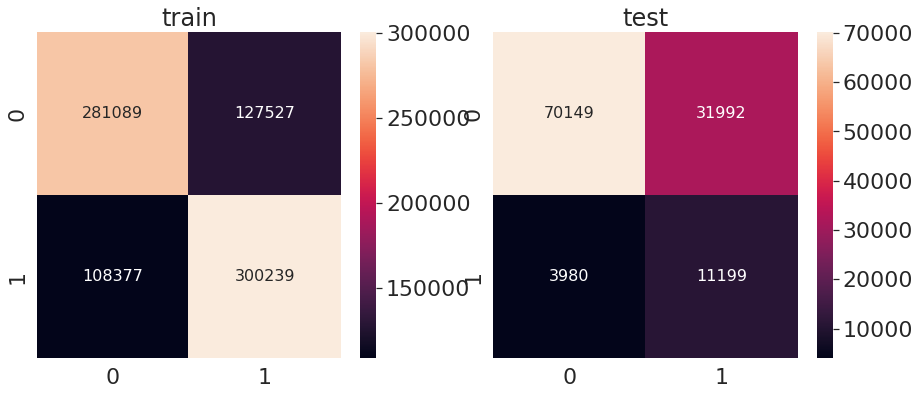

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

In [ ]:
classifier.named_steps["xgboost"].get_params()


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier(n_estimators = 100,
                            gamma = 0.5,
                            max_depth = 6,
                            learning_rate = 0.1,
                            min_child_weight = 1,
                            subsample = 1,
                            colsample_bytree = 1,
                            objective = 'binary:logistic',
                              random_state = 42)),
])

classifier.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('duration',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f3e8e492ca0>,
                                                                                       func=<function column_ratio at 0x7f3e8e492280>)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['duration_ms']),
                                                 ('cat',
                                                  Pipe...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('xgboost',
                 XGBClassifier(gamma=0.5, max_depth=6, random_state=42))])




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.7415    0.7046    0.7226    408616
           1     0.7186    0.7544    0.7361    408616

    accuracy                         0.7295    817232
   macro avg     0.7301    0.7295    0.7293    817232
weighted avg     0.7301    0.7295    0.7293    817232


ROC AUC Score: 0.729510102394424

Confusion Matrix:
[[287927 120689]
 [100364 308252]]

AxesSubplot(0.125,0.125;0.281818x0.755)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.9473    0.7018    0.8063    102141
           1     0.2687    0.7373    0.3939     15179

    accuracy                         0.7064    117320
   macro avg     0.6080    0.7195    0.6001    117320
weighted avg     0.8595    0.7064    0.7529    117320


ROC AUC Score: 0.7195413768139607

Confusion Matrix:
[[71684 30457]
 [ 3988 11191]]

AxesSubplot(0.547727,0.125;0.281818x0.755)




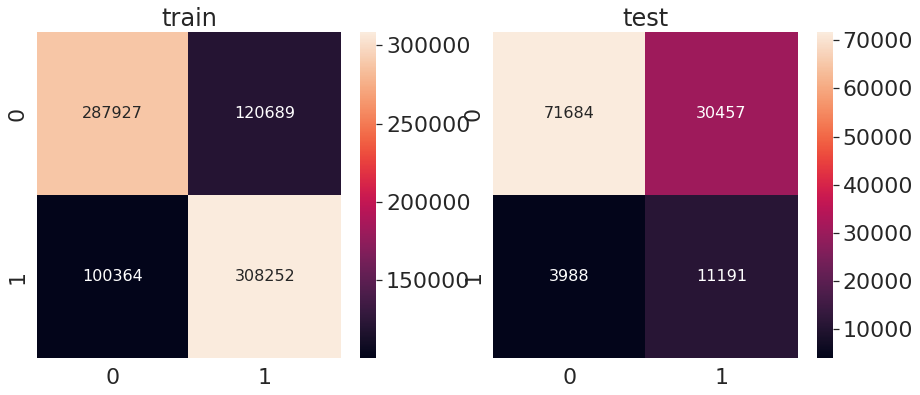

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

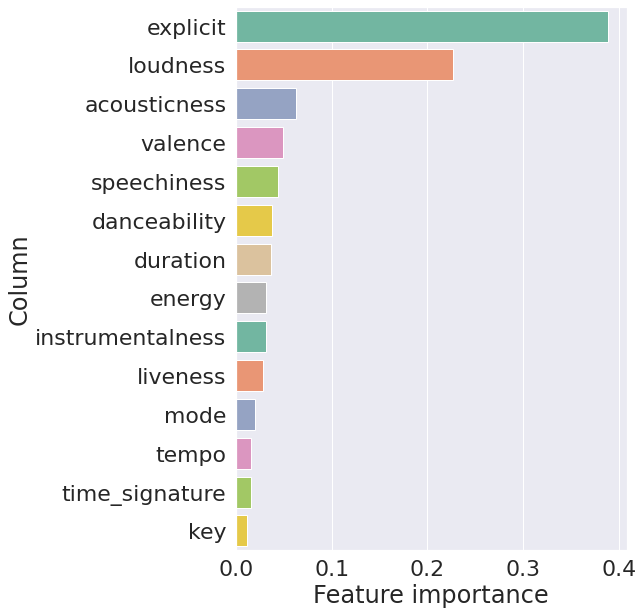

In [ ]:
features_importance_xg = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["xgboost"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance_xg, palette = "Set2", orient = 'h');

In [ ]:
features_importance_xg

,Column,Feature importance
1,explicit,0.388820
5,loudness,0.226532
8,acousticness,0.063170
11,valence,0.048904
7,speechiness,0.044044
2,danceability,0.037344
0,duration,0.036990
3,energy,0.031452
9,instrumentalness,0.031162
10,liveness,0.028648


#.  

In [ ]:
#track data
df_2022 = pd.read_csv('/content/drive/MyDrive/INST 661/output.csv', header = 0)

In [ ]:
df_2022.shape

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_2022, test_size = 0.2, random_state = 42)

In [ ]:
df4 = train.copy()
len(df4)

In [ ]:
#0 as less popular, 1 as highly popular
df4["highly_popular"] = pd.cut(df4["track_popularity"],
                               bins=[0, 49, 100],
                               labels=[0, 1],
                                include_lowest=True)

In [ ]:
df4['highly_popular'].value_counts()